In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
# Threshold functions

def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Grayscaling input image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate directional gradient
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == "y":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Absolute values and normalizing
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply thresholds
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[np.logical_and(scaled_sobel >= thresh[0], scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Grayscaling input image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate directional gradient
    xsobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    ysobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Absolute values and normalizing
    magn_sobel = np.sqrt(np.square(xsobel) + np.square(ysobel))
    scaled_magn = np.uint8(255*magn_sobel/np.max(magn_sobel))
    # Apply thresholds
    mag_binary = np.zeros_like(magn_sobel)
    mag_binary[np.logical_and(scaled_magn >= mag_thresh[0], scaled_magn <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscaling input image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate directional gradient
    xsobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    ysobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_xsobel = np.absolute(xsobel)
    abs_ysobel = np.absolute(ysobel)
    # Gradient direction and normalization
    direct_sobel = np.arctan2(abs_ysobel, abs_xsobel)
    # Apply thresholds
    dir_binary = np.zeros_like(direct_sobel)
    dir_binary[np.logical_and(direct_sobel >= thresh[0], direct_sobel <= thresh[1])] = 1
    return dir_binary


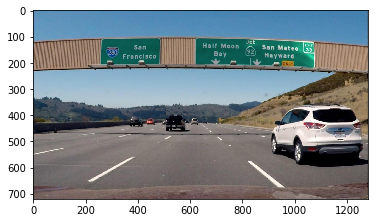

In [3]:
# Sample picture input
image = mpimg.imread("./signs_vehicles_xygrad.png")
plt.imshow(image); 

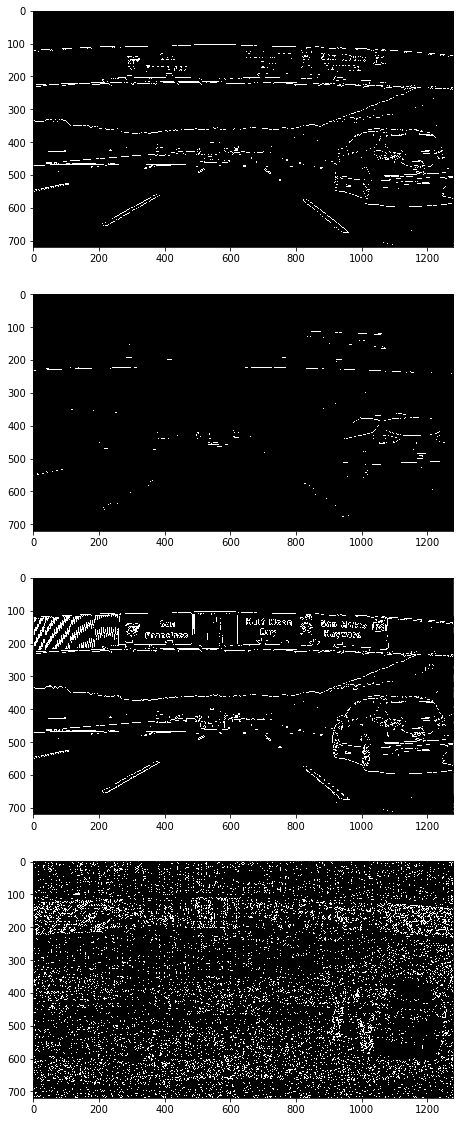

In [4]:
# Chose kernel size
ksize = 3

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(100, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(np.pi/32, np.pi/8))

# Plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,20))
ax1.imshow(gradx, cmap="gray")
ax2.imshow(grady, cmap="gray")
ax3.imshow(mag_binary, cmap="gray")
ax4.imshow(dir_binary, cmap="gray")

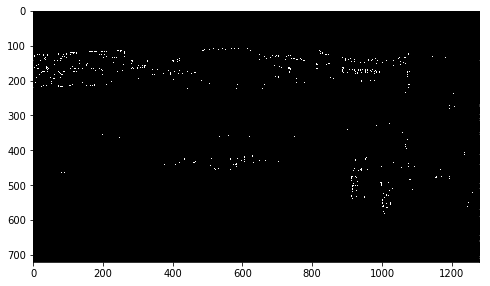

In [8]:
# Combination of multiple features
combinedFeatures = np.zeros_like(dir_binary)
combinedFeatures[np.logical_and(mag_binary == 1, dir_binary == 1)] = 1

plt.figure(figsize=(8,10))
plt.imshow(combinedFeatures, cmap="gray"); 